<a href="https://colab.research.google.com/github/vidurp/notebooks/blob/main/PASCAL_VOC_Dataset_Parsing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Parse PASCAL Annotation Format v1.0

Noteboook to implement code to parse annotation files for PASCAL VOC Dataset

http://host.robots.ox.ac.uk/pascal/VOC/

In [1]:
#Example Annotation Text File
# This is a sample string with 2 objects, although not present in PASCAL-VOC 2005,
# we can support it now

String = '''# PASCAL Annotation Version 1.00

Image filename : "VOC2005_1/PNGImages/ETHZ_motorbike-testset/motorbikes005.png"
Image size (X x Y x C) : 640 x 480 x 3
Database : "The VOC2005 Dataset 1 Database (ETHZ)"
Objects with ground truth : 2 { "A", "B" }

# Note that there might be other objects in the image
# for which ground truth data has not been provided.

# Top left pixel co-ordinates : (1, 1)

# Details for object 1 ("A")
Original label for object 1 "A" : "Class_A"
Bounding box for object 1 "A" (Xmin, Ymin) - (Xmax, Ymax) : (206, 242) - (427, 365)

# Details for object 2 ("B")
Original label for object 2 "B" : "Class_B"
Bounding box for object 2 "B" (Xmin, Ymin) - (Xmax, Ymax) : (112, 112) - (333, 333)
'''
print(String)

# PASCAL Annotation Version 1.00

Image filename : "VOC2005_1/PNGImages/ETHZ_motorbike-testset/motorbikes005.png"
Image size (X x Y x C) : 640 x 480 x 3
Database : "The VOC2005 Dataset 1 Database (ETHZ)"
Objects with ground truth : 2 { "A", "B" }

# Note that there might be other objects in the image
# for which ground truth data has not been provided.

# Top left pixel co-ordinates : (1, 1)

# Details for object 1 ("A")
Original label for object 1 "A" : "Class_A"
Bounding box for object 1 "A" (Xmin, Ymin) - (Xmax, Ymax) : (206, 242) - (427, 365)

# Details for object 2 ("B")
Original label for object 2 "B" : "Class_B"
Bounding box for object 2 "B" (Xmin, Ymin) - (Xmax, Ymax) : (112, 112) - (333, 333)



In [2]:
import re

def ParsePascalString( str ):
    Lines = str.split('\n')
    ClassList = []
    BndBoxList = []
    for line in Lines:
        if 'filename' in line:
            line = line.split(':')
            FileName = re.findall(r'(?<=["\']).*?(?=["\'])', line[1])
        if 'Original' in line:
            line = line.split(':')
            ClassList.append(re.findall(r'(?<=["\']).*?(?=["\'])', line[1]))
        if 'Image size' in line:
            line = line.split(':')
            ImageSize  = re.findall('\d+',line[1])
        if 'Bounding' in line:
            line = line.split(':')
            BndBoxList.append(re.findall('\d+',line[1]))
        if 'Objects with ground truth' in line:
            line = line.split(':')
            NumObjects = re.findall(r'\d+', line[1])

    Dict = {
        'filepath' : FileName[0],
        'numobjects' : NumObjects[0],
        'imagesize' : {
            'width': ImageSize[0],
            'height': ImageSize[1],
            'channels': ImageSize[2]
        },
        'object' : []
    }

    # Populate all Objects
    for Idx in range(int(NumObjects[0])):
        Obj = {
            'label' : ClassList[Idx][0],
            'bndbox' : {
                'xmin': BndBoxList[Idx][0],
                'ymin': BndBoxList[Idx][1],
                'xmax': BndBoxList[Idx][2],
                'ymax': BndBoxList[Idx][3]
                }
        }

        Dict['object'].append(Obj)

    return ( Dict )

In [3]:
# test parsing
print(ParsePascalString(String))

{'filepath': 'VOC2005_1/PNGImages/ETHZ_motorbike-testset/motorbikes005.png', 'numobjects': '2', 'imagesize': {'width': '640', 'height': '480', 'channels': '3'}, 'object': [{'label': 'Class_A', 'bndbox': {'xmin': '206', 'ymin': '242', 'xmax': '427', 'ymax': '365'}}, {'label': 'Class_B', 'bndbox': {'xmin': '112', 'ymin': '112', 'xmax': '333', 'ymax': '333'}}]}


# Get the dataset

In [4]:
!wget http://host.robots.ox.ac.uk/pascal/VOC/download/voc2005_1.tar.gz

--2025-01-18 22:35:24--  http://host.robots.ox.ac.uk/pascal/VOC/download/voc2005_1.tar.gz
Resolving host.robots.ox.ac.uk (host.robots.ox.ac.uk)... 129.67.94.152
Connecting to host.robots.ox.ac.uk (host.robots.ox.ac.uk)|129.67.94.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 487614356 (465M) [application/x-gzip]
Saving to: ‘voc2005_1.tar.gz’

voc2005_1.tar.gz    100%[===================>] 465.02M  24.5MB/s    in 20s     

2025-01-18 22:35:44 (23.7 MB/s) - ‘voc2005_1.tar.gz’ saved [487614356/487614356]



In [5]:
import tarfile
with tarfile.open('voc2005_1.tar.gz', 'r:gz') as tar:
        tar.extractall(path='.')


In [6]:
# check number for files in PASCAL VOC 2005 set
import os
ImageFileCount = 0
for root, dir, files in os.walk('/content/VOC2005_1/PNGImages'):
    print(f'Dir {root} has {len(dir)} dirs, {len(files)} files')
    ImageFileCount = ImageFileCount + len(files)

print(f'Total Files {ImageFileCount}')

Dir /content/VOC2005_1/PNGImages has 9 dirs, 0 files
Dir /content/VOC2005_1/PNGImages/UIUC_TestImages has 0 dirs, 136 files
Dir /content/VOC2005_1/PNGImages/ETHZ_sideviews-cars has 0 dirs, 50 files
Dir /content/VOC2005_1/PNGImages/ETHZ_motorbike-testset has 0 dirs, 95 files
Dir /content/VOC2005_1/PNGImages/TUGraz_person has 0 dirs, 168 files
Dir /content/VOC2005_1/PNGImages/UIUC_TestImages_Scale has 0 dirs, 76 files
Dir /content/VOC2005_1/PNGImages/Caltech_motorbikes_side has 0 dirs, 335 files
Dir /content/VOC2005_1/PNGImages/TUGraz_bike has 0 dirs, 228 files
Dir /content/VOC2005_1/PNGImages/Caltech_cars has 0 dirs, 14 files
Dir /content/VOC2005_1/PNGImages/TUGraz_cars has 0 dirs, 271 files
Total Files 1373


# JSONify the Annotations

In [7]:
import json
def CreateJSONFromPascalDataSet( RootFilePath, JSONFileName ):
    """
    Creates a JSON File from a Tree Structure of PASCAL VOC image data
    PASCAL - Pattern Analysis, Statistical Modeling & Computational Learning
             built by University of Oxford. The root directory is expected in the
             following format
              VOC
              +->Annotations
                    +->Class1
                    +->Class2
              +->GTMasks
                    +->Class1
                    +->Class2
              +->PNGImages
                    +->Class1
                    +->Class2

    Args:
      RootFilePath - Dataset Root directory
      JSONFileName - JSON File to save

    Returns:
       void
    """
    # Write the data to a JSON file
    JsonData = { 'Files' : [],
                 'labels' : []
    }

    Idx = 0
    LabelClasses = []
    with open(JSONFileName, "w") as outfile:
        for Root, Dirs, Files in os.walk( RootFilePath + '/Annotations' ):
            for File in Files:
                with open(Root + '/' + File, 'r') as TextFile:
                    Text = TextFile.read()
                    TextFile.close()
                    # extract dict from text file
                    tokens = ParsePascalString( Text )
                    JsonData[ 'Files' ].append(tokens)

                    # Extract Class Names from all detections in this image
                    for j in range(int(tokens['numobjects'])):
                        objclassname = tokens['object'][j]['label']
                        if objclassname not in LabelClasses :
                            LabelClasses.append(objclassname)

                    Idx = Idx + 1

        # Write num images to dict
        JsonData['NumImages'] = Idx

        # Write class lables to dict
        for Idx in range(len(LabelClasses)):
            JsonData['labels'].append({'label' : LabelClasses[Idx]})


        # convert dict to json, set indent paramter so it
        # doesn't all appear on one line
        json_string = json.dumps(JsonData, indent = 4 )
        # write json  to disc
        outfile.write(json_string)
        outfile.close()




In [11]:
CreateJSONFromPascalDataSet('/content/VOC2005_1','voc2005.json')

#Visualize Random PASCAL VOC data from JSON

In [8]:
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy
import random
import cv2

In [12]:
with open('voc2005.json', 'r') as f:
    data = json.load(f)

data.keys()

dict_keys(['Files', 'labels', 'NumImages'])

In [13]:
# Print out the Image Classes
classes = data['labels']
classes

[{'label': 'carSide'},
 {'label': 'motorbikeSide'},
 {'label': 'person'},
 {'label': 'motorbikes'},
 {'label': 'bike'},
 {'label': 'carRear'},
 {'label': 'car'}]

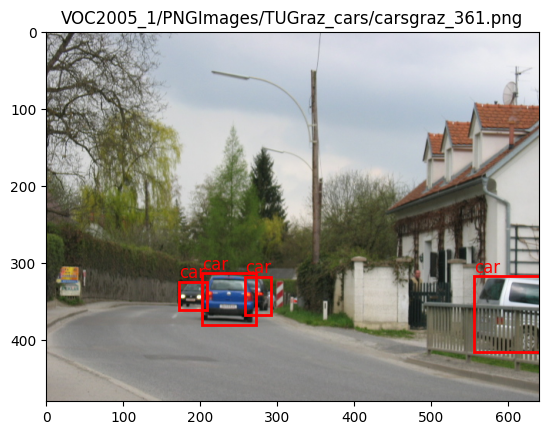

In [ ]:
RandImg = random.choice(data['Files'])
FilePath = RandImg['filepath']
img = plt.imread(FilePath)
if img.ndim == 3 and img.shape[2] != 3:
    img = img[:,:,3]
if len(img.shape) != 3:
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
fig, ax = plt.subplots()
plt.imshow(img)

Objects = RandImg['object']
for idx in range(len(Objects)):
    obj = Objects[idx]
    label = obj['label']
    xmin = int(obj['bndbox']['xmin'])
    ymin = int(obj['bndbox']['ymin'])
    xmax = int(obj['bndbox']['xmax'])
    ymax = int(obj['bndbox']['ymax'])
    bbox = [ xmin, ymin, xmax, ymax ]
    # Create a Rectangle patch
    rect = patches.Rectangle((xmin, ymin), (xmax-xmin), (ymax-ymin), linewidth=2, edgecolor='r', facecolor='none')
    # Add the patch to the Axes
    ax.add_patch(rect)
    plt.text(xmin, ymin - 5, label, fontsize=12, color='r')
    plt.title(f'{FilePath}')




# Create the Dataset

In [9]:
import json
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [10]:
import tensorflow as tf
print(tf.__version__)

2.17.1


In [123]:
def CreateOutputTensor( jsondata, idx, ImgScale, ClassLabels, C, S, B ):
    """
    Creates a YOLO friendly numpy PREDICTION/TRUTH tensor from input files
    Notes:
    The shape of the output tensor
        1. Image is divided into S x S cells
        2. Each cell makes upto B predictions
        3. Each prediction is a 5-tuple ( xmin, ymin, width, height, Confidence )
        4. YOLO also makes a classification prediction one of C classes
    So Tensor shape = S x S x ( 5B + C )

    Args:
        jsondata: json object of input dataset

        idx:      index of object in dataset

        ImgScale: tuple representing pixel size of image

        ClassLabels: list containing string class labels

        C:        Number of Prediction Classes

        S:        Number of Grid cells along each image dimension

        B:        Number of predictions per grid cell

    Returns:
        TruthTensor: numpy array of shape ( S, S, ( 5B + C ))
    """
    TruthTensor = np.zeros(shape=(S,S,((5*B) + C)))

    NumDetections = jsondata['Files'][idx]['numobjects']

    #Grid Cell size in Pixels
    xGridSize = ImgScale[0] // S
    yGridSize = ImgScale[1] // S

    # true image size
    imgwidth = int(jsondata['Files'][idx]['imagesize']['width'])
    imgheight  = int(jsondata['Files'][idx]['imagesize']['height'])

    # Calculate x,y coordinate scale percentage
    xscale = ImgScale[0] / imgwidth
    yscale = ImgScale[1] / imgheight

    # Mechanism to Track Num Predictions Per Cell
    NumPredictionsPerGridCell = np.zeros(shape=(S,S),dtype=np.uint32)

    for obj in range(int(NumDetections)):
        # Object Class
        ImageClass = jsondata['Files'][idx]['object'][obj]['label']
        ClassIndex = ClassLabels.index(ImageClass)

        # Bounding Box
        xmin = int(jsondata['Files'][idx]['object'][obj]['bndbox']['xmin'])
        ymin = int(jsondata['Files'][idx]['object'][obj]['bndbox']['ymin'])
        xmax = int(jsondata['Files'][idx]['object'][obj]['bndbox']['xmax'])
        ymax = int(jsondata['Files'][idx]['object'][obj]['bndbox']['ymax'])

        # Rescale bounding box from True Image Dimensions to ImgScale
        width = ( xmax - xmin ) * xscale
        height = ( ymax - ymin ) * yscale
        xmin = xmin * xscale
        ymin = ymin * yscale
        xmax = xmax * xscale
        ymax = ymax * yscale

        # Find the grid cell this is assigned to
        xcenter = int((( xmin + xmax ) / 2 ) // xGridSize)
        ycenter = int((( ymin + ymax ) / 2 ) // yGridSize)

        # Normalize The bounding box to range [0,1]
        xmin /= ImgScale[0]
        ymin /= ImgScale[1]
        width /= ImgScale[0]
        height /= ImgScale[1]

        # Each Grid Cell can make at most B predictions
        NumPredForCurrentGridCell = NumPredictionsPerGridCell[xcenter,ycenter]
        if NumPredForCurrentGridCell <= B:
            # Insert Predicted Class
            ClassVector = np.zeros(C)
            ClassVector[ClassIndex] = 1.0
            TruthTensor[xcenter,xcenter,(5*B):] = ClassVector

            # Insert BBox into corret Prediction Slot
            TruthTensor[xcenter,xcenter,(5*NumPredForCurrentGridCell): ((5*NumPredForCurrentGridCell)+ 5) ] = [ xmin, ymin, width, height, 1.0 ]

            # Book-keeping, keep track of num detections per cell
            NumPredictionsPerGridCell[xcenter,ycenter] += 1

    # return Tensor
    return TruthTensor

In [124]:
def CreateYOLODataSet( JSONFilePath, ImgScale = (224,224), S = 7, B = 2 ):
    """
    Creates a Image DataSet suitable for YOLO Object detection
    Redmon et.al https://arxiv.org/abs/1506.02640

    Args:
        JSONFilePath - JSON formated Image Descriptor

        ImgScale - Images are scaled to default 224,224

        S - Images are divided into SxS uniform cells

        B - Max Number of BBoxes prediced by each cell

    Returns:
        ImgDataTensor - numpy list of resized images

        TruthTensor   - numpy list of truth tensors
    """
    FileHandle = open(JSONFilePath, 'r')
    jsondata = json.load(FileHandle)
    FileHandle.close()
    ImgDataTensor = []
    TruthTensor = []

    # Num Classes
    C = len(jsondata['labels'])
    # Extract Class Labels as a list
    ClassLabels = [ indx['label'] for indx in jsondata['labels']]

    for idx in range(int(jsondata['NumImages'])):
        ImgData = plt.imread(jsondata['Files'][idx]['filepath'])
        # convert monochrome image to color, i.e. 3 channels
        if ImgData.ndim != 3:
            ImgData = cv2.cvtColor(ImgData, cv2.COLOR_GRAY2BGR)
        # PNG images may have a ALPHA/transparency channel shape = ( x, y, 4),
        # suppress it
        if ImgData.ndim == 3 and ImgData.shape[2] != 3:
            ImgData = ImgData[:,:,:3]
        ImgData = cv2.resize( ImgData, dsize=ImgScale, interpolation=cv2.INTER_CUBIC)

        ImgDataTensor.append( ImgData )

        # Output Tensor ( YOLO formatted )
        YoloTensor = CreateOutputTensor( jsondata, idx, ImgScale, ClassLabels, C, S, B )
        TruthTensor.append( YoloTensor )

    return ImgDataTensor, TruthTensor

In [125]:
imgtensor,truthtensor = CreateYOLODataSet('/content/voc2005.json')


In [112]:
len(imgtensor),imgtensor[0].shape, len(truthtensor),truthtensor[0].shape

(1373, (224, 224, 3), 1373, (7, 7, 17))

In [126]:
truthtensor[0][3,3,:]

array([0.21088435, 0.33      , 0.67346939, 0.39      , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [130]:
PascalDataSet = tf.data.Dataset.from_tensor_slices((imgtensor,truthtensor))

In [132]:
PascalDataSet,len(PascalDataSet)

(<_TensorSliceDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(7, 7, 17), dtype=tf.float64, name=None))>,
 1373)